<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#Hotel-Review-Problem" data-toc-modified-id="Hotel-Review-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hotel Review Problem</a></span></li><li><span><a href="#Exploratory-Data-Analytics" data-toc-modified-id="Exploratory-Data-Analytics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analytics</a></span><ul class="toc-item"><li><span><a href="#Score-Distribution" data-toc-modified-id="Score-Distribution-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Score Distribution</a></span></li><li><span><a href="#Data-Sampling" data-toc-modified-id="Data-Sampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Sampling</a></span></li><li><span><a href="#Binary-Problem" data-toc-modified-id="Binary-Problem-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Binary Problem</a></span></li><li><span><a href="#Reference-Accuracy" data-toc-modified-id="Reference-Accuracy-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Reference Accuracy</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Non-numeric-Columns" data-toc-modified-id="Non-numeric-Columns-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Non-numeric Columns</a></span></li><li><span><a href="#Strings-in-Numeric-Columns" data-toc-modified-id="Strings-in-Numeric-Columns-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Strings in Numeric Columns</a></span></li><li><span><a href="#Formatting-for-Modeling" data-toc-modified-id="Formatting-for-Modeling-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Formatting for Modeling</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Train-Test Split</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Tokenizer-Function" data-toc-modified-id="Tokenizer-Function-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Tokenizer Function</a></span></li><li><span><a href="#Text-Vectoization" data-toc-modified-id="Text-Vectoization-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Text Vectoization</a></span></li><li><span><a href="#Tokenizer-Validation" data-toc-modified-id="Tokenizer-Validation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Tokenizer Validation</a></span></li><li><span><a href="#Concatination-of-Vectoized-Reviews" data-toc-modified-id="Concatination-of-Vectoized-Reviews-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Concatination of Vectoized Reviews</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></div>

# Hotel Review Problem

This project involves cleaning, exploration, and feature engineering of [a hotel review dataset](https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe) to create a model that can accurately label the sentiment behind review comments. The dataset was downloaded as csv format and loaded as follows: 

In [1]:
# NLTK packages
# nltk.download('stopwords')
# nltk.download('wordnet')

In [2]:
# frequently used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# NLP libraries
import nltk
import string
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

In [3]:
review_df = pd.read_csv('UK_Hotel_Reviews.csv')

Table below shows an overview information of the dataset

In [4]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170649 entries, 0 to 170648
Data columns (total 17 columns):
Hotel_Address                                 170649 non-null object
Additional_Number_of_Scoring                  170649 non-null int64
Review_Date                                   170649 non-null object
Average_Score                                 170649 non-null float64
Hotel_Name                                    170649 non-null object
Reviewer_Nationality                          170649 non-null object
Negative_Review                               170649 non-null object
Review_Total_Negative_Word_Counts             170649 non-null int64
Total_Number_of_Reviews                       170649 non-null int64
Positive_Review                               170649 non-null object
Review_Total_Positive_Word_Counts             170649 non-null int64
Total_Number_of_Reviews_Reviewer_Has_Given    170649 non-null int64
Reviewer_Score                                170649 non-null flo

The dataset has 17 features and 170649 observations. Some columns have integer variable type (e.g., Additional_Number_of_Scoring) while others are in form of text.

The table below shows content of the table for five first observations:

In [5]:
review_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,1 15 Templeton Place Earl s Court Kensington a...,244,6/30/2017,8.5,K K Hotel George,United Kingdom,Room wasn t ready on arrival after travelling...,94,1831,Fantastic location very clean room someone ca...,23,3,5.8,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",34 days,51.491888,-0.194971
1,1 15 Templeton Place Earl s Court Kensington a...,244,6/27/2017,8.5,K K Hotel George,United Kingdom,Our room allocated wasn t up to our expectati...,40,1831,Breakfast was excellent Staff in the restaura...,25,3,6.7,"[' Leisure trip ', ' Group ', ' Classic Triple...",37 days,51.491888,-0.194971
2,1 15 Templeton Place Earl s Court Kensington a...,244,6/27/2017,8.5,K K Hotel George,United Kingdom,The cooked elements of breakfast could have b...,18,1831,The garden was a bonus Lovely area to have so...,25,12,8.3,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",37 days,51.491888,-0.194971
3,1 15 Templeton Place Earl s Court Kensington a...,244,6/25/2017,8.5,K K Hotel George,United Kingdom,The room was a lot smaller than advertised I ...,155,1831,Great location it s easy to find and incredib...,97,5,7.1,"[' Leisure trip ', ' Solo traveler ', ' Classi...",39 days,51.491888,-0.194971
4,1 15 Templeton Place Earl s Court Kensington a...,244,6/25/2017,8.5,K K Hotel George,United Kingdom,Lower ground floor room L01 possibly the smal...,32,1831,Location first and foremost Lovely gardens,8,2,5.0,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",39 days,51.491888,-0.194971


# Exploratory Data Analytics

This section peforms exploratory analytics on the dataset. The analytics involves couting the number of reviews for each score and using them to create a baseline for accuracy of predictions.

## Score Distribution

Since the objective is to label the sentiments, distribution of the labels have been investigated. The table shows that reviewer scores are in float format, so they have been rounded to the closest integer value to create a finite number of distinct categories 

In [6]:
review_df['Reviewer_Score'] = review_df['Reviewer_Score'].round(0).astype(int)

Below bar chart shows number of reviews in each review score category

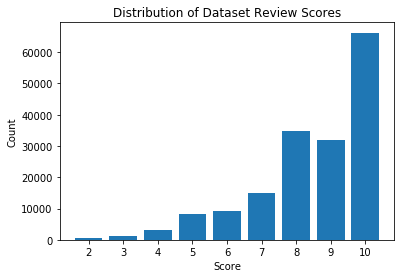

In [7]:
plt.bar(review_df['Reviewer_Score'].value_counts().index, review_df['Reviewer_Score'].value_counts().values)
plt.title('Distribution of Dataset Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(review_df['Reviewer_Score'].value_counts().index);

The data is imbalanced because the number of higher scores are by far larger than lower scores.

## Data Sampling

To mitigate the computation cost, 10% of the observations are randomly chosen for analysis as follows:

In [8]:
sample_df = review_df.sample(frac=0.1, random_state=42)

In [9]:
sample_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
52538,22 25 Finsbury Square City Islington London EC...,461,4/18/2017,9.2,Montcalm Royal London House City of London,United Kingdom,The shower could have been warmer,8,1592,Excellent facilities and use of technology in...,15,2,10,"[' Leisure trip ', ' Group ', ' Deluxe Double ...",107 day,51.521807,-0.085608
37915,18 30 Lexham Gardens Kensington and Chelsea Lo...,137,11/26/2015,8.3,The Park City Grand Plaza Kensington Hotel,United Kingdom,Overpriced for the facilities received Cracks...,28,667,Comfortable bed and lovely sized room great view,9,3,7,"[' Leisure trip ', ' Couple ', ' Executive Dou...",616 day,51.495498,-0.189369
107742,6 Holywell Lane Hackney London EC2A 3ET United...,500,7/3/2017,9.1,citizenM London Shoreditch,United Kingdom,No Negative,0,2113,lovely clean comfy bed upto date media food l...,28,13,10,"[' Leisure trip ', ' Couple ', ' Double Room '...",31 days,51.524137,-0.078698
109161,61 Lincoln s Inn Fields Camden London WC2A 3JW...,681,9/15/2015,8.9,Club Quarters Hotel Lincoln s Inn Fields,United Kingdom,Room was very close to the lift hence a lot o...,17,2692,Fantastic welcome by the staff and a thoughtf...,32,1,9,"[' Leisure trip ', ' Group ', ' Superior Queen...",688 day,51.516099,-0.118175
17848,11 12 Poplar Mews Shepherd s Bush Hammersmith ...,227,11/20/2016,8.0,Shepherd s Bush Boutique Hotel,United Kingdom,Even the King bedroom was tiny reception was ...,47,1069,An excellent location to see a show at the Em...,24,10,8,"[' Business trip ', ' Couple ', ' King Room ',...",256 day,51.505454,-0.226222


To validate similarities between information in sample with information in dataset, bar chart of scores is repeated for sample as follows:

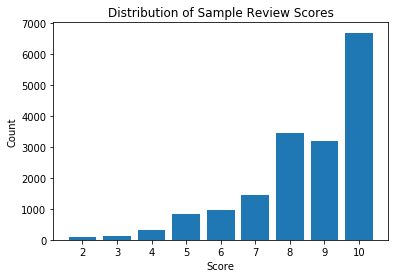

In [10]:
plt.bar(sample_df['Reviewer_Score'].value_counts().index, sample_df['Reviewer_Score'].value_counts().values)
plt.title('Distribution of Sample Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(sample_df['Reviewer_Score'].value_counts().index);

The count of scores is in general 10 folds lower than the original dataset, but the pattern for different categories is identical.

## Binary Problem

To evaluate the model, the 10-class classification problem is simplified to a 0-1 binary classification. The reviews with scores 9 and 10 are grouped together and labled as 1 while reviews with score less than 9 are labeled as 0.

In [11]:
sample_df['Reviewer_Score'] = (sample_df['Reviewer_Score'] > 8).astype(int)
sample_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
52538,22 25 Finsbury Square City Islington London EC...,461,4/18/2017,9.2,Montcalm Royal London House City of London,United Kingdom,The shower could have been warmer,8,1592,Excellent facilities and use of technology in...,15,2,1,"[' Leisure trip ', ' Group ', ' Deluxe Double ...",107 day,51.521807,-0.085608
37915,18 30 Lexham Gardens Kensington and Chelsea Lo...,137,11/26/2015,8.3,The Park City Grand Plaza Kensington Hotel,United Kingdom,Overpriced for the facilities received Cracks...,28,667,Comfortable bed and lovely sized room great view,9,3,0,"[' Leisure trip ', ' Couple ', ' Executive Dou...",616 day,51.495498,-0.189369
107742,6 Holywell Lane Hackney London EC2A 3ET United...,500,7/3/2017,9.1,citizenM London Shoreditch,United Kingdom,No Negative,0,2113,lovely clean comfy bed upto date media food l...,28,13,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",31 days,51.524137,-0.078698
109161,61 Lincoln s Inn Fields Camden London WC2A 3JW...,681,9/15/2015,8.9,Club Quarters Hotel Lincoln s Inn Fields,United Kingdom,Room was very close to the lift hence a lot o...,17,2692,Fantastic welcome by the staff and a thoughtf...,32,1,1,"[' Leisure trip ', ' Group ', ' Superior Queen...",688 day,51.516099,-0.118175
17848,11 12 Poplar Mews Shepherd s Bush Hammersmith ...,227,11/20/2016,8.0,Shepherd s Bush Boutique Hotel,United Kingdom,Even the King bedroom was tiny reception was ...,47,1069,An excellent location to see a show at the Em...,24,10,0,"[' Business trip ', ' Couple ', ' King Room ',...",256 day,51.505454,-0.226222


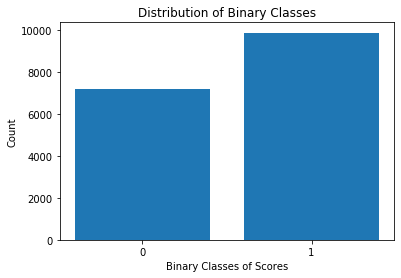

In [12]:
count_series = sample_df['Reviewer_Score'].value_counts()
plt.bar(count_series.index, count_series.values)
plt.title('Distribution of Binary Classes')
plt.xlabel('Binary Classes of Scores')
plt.ylabel('Count')
plt.xticks(count_series.index);

The comparison of bar charts suggests that combination of classes has improved the balance between classes for prediction. 

## Reference Accuracy

To create a baseline for prediction accuracy, the fraction of each class are calculated as follows:

In [13]:
count_df = pd.DataFrame({'class':count_series.index, 'fraction':count_series.values/count_series.values.sum()})
count_df

,class,fraction
0,1,0.578494
1,0,0.421506


The probability of a review being in class 1 (i.e., review score of 9 and 10) is about 58% based only on the counts of train data. This suggests that ignoring any other information about reviews one can predict class 1 for all future cases and be right 58% of the time. Therefore, the machine learning models considering the features associated with the reviews should be able to have higher accuracies.

# Data Cleaning

This section describes the data cleaning steps implemented before analyzing the data.

## Non-numeric Columns

As the number of unique values in non-integer columns were high, the features are dropped out of the dataset.

In [14]:
sample_df.nunique()

Hotel_Address                                   393
Additional_Number_of_Scoring                    308
Review_Date                                     731
Average_Score                                    31
Hotel_Name                                      394
Reviewer_Nationality                              1
Negative_Review                               11685
Review_Total_Negative_Word_Counts               236
Total_Number_of_Reviews                         378
Positive_Review                               14632
Review_Total_Positive_Word_Counts               168
Total_Number_of_Reviews_Reviewer_Has_Given       87
Reviewer_Score                                    2
Tags                                           4211
days_since_review                               731
lat                                             391
lng                                             391
dtype: int64

In [15]:
sample_df.drop(['Hotel_Address', 'Hotel_Name', 'Review_Date', 'Reviewer_Nationality', 'Tags'], axis=1, inplace=True)

In [16]:
sample_df.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng
52538,461,9.2,The shower could have been warmer,8,1592,Excellent facilities and use of technology in...,15,2,1,107 day,51.521807,-0.085608
37915,137,8.3,Overpriced for the facilities received Cracks...,28,667,Comfortable bed and lovely sized room great view,9,3,0,616 day,51.495498,-0.189369
107742,500,9.1,No Negative,0,2113,lovely clean comfy bed upto date media food l...,28,13,1,31 days,51.524137,-0.078698
109161,681,8.9,Room was very close to the lift hence a lot o...,17,2692,Fantastic welcome by the staff and a thoughtf...,32,1,1,688 day,51.516099,-0.118175
17848,227,8.0,Even the King bedroom was tiny reception was ...,47,1069,An excellent location to see a show at the Em...,24,10,0,256 day,51.505454,-0.226222


## Strings in Numeric Columns

The strings at the end of the values in `days_since_review` column has been striped in order to convert the values to integer.

In [17]:
# remove strings from end of the numbers
sample_df.days_since_review = sample_df.days_since_review.map(lambda x: x.rstrip(' days'))

In [18]:
sample_df.days_since_review = sample_df.days_since_review.astype(int)

Table below validates that the velues in this column were convertable to integer after the strip process.

In [19]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17065 entries, 52538 to 118779
Data columns (total 12 columns):
Additional_Number_of_Scoring                  17065 non-null int64
Average_Score                                 17065 non-null float64
Negative_Review                               17065 non-null object
Review_Total_Negative_Word_Counts             17065 non-null int64
Total_Number_of_Reviews                       17065 non-null int64
Positive_Review                               17065 non-null object
Review_Total_Positive_Word_Counts             17065 non-null int64
Total_Number_of_Reviews_Reviewer_Has_Given    17065 non-null int64
Reviewer_Score                                17065 non-null int32
days_since_review                             17065 non-null int32
lat                                           17065 non-null float64
lng                                           17065 non-null float64
dtypes: float64(3), int32(2), int64(5), object(2)
memory usage: 1.6+ MB


## Formatting for Modeling

The dataframe is transformed to a format compatible with sckit learn libraries.

In [20]:
target = sample_df['Reviewer_Score']
sample_df.drop('Reviewer_Score', axis='columns', inplace=True)
sample_df['Reviewer_Score'] = target

In [21]:
X = sample_df.iloc[:,:-1]
X.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng
52538,461,9.2,The shower could have been warmer,8,1592,Excellent facilities and use of technology in...,15,2,107,51.521807,-0.085608
37915,137,8.3,Overpriced for the facilities received Cracks...,28,667,Comfortable bed and lovely sized room great view,9,3,616,51.495498,-0.189369
107742,500,9.1,No Negative,0,2113,lovely clean comfy bed upto date media food l...,28,13,31,51.524137,-0.078698
109161,681,8.9,Room was very close to the lift hence a lot o...,17,2692,Fantastic welcome by the staff and a thoughtf...,32,1,688,51.516099,-0.118175
17848,227,8.0,Even the King bedroom was tiny reception was ...,47,1069,An excellent location to see a show at the Em...,24,10,256,51.505454,-0.226222


In [22]:
y = sample_df.iloc[:,-1]
y

52538     1
37915     0
107742    1
109161    1
17848     0
         ..
10890     1
115414    0
162245    1
161571    1
118779    1
Name: Reviewer_Score, Length: 17065, dtype: int32

## Train-Test Split

The data and labels are split to train and test section for validation of the models

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
sample_df[['Negative_Review','Positive_Review']]

,Negative_Review,Positive_Review
52538,The shower could have been warmer,Excellent facilities and use of technology in...
37915,Overpriced for the facilities received Cracks...,Comfortable bed and lovely sized room great view
107742,No Negative,lovely clean comfy bed upto date media food l...
109161,Room was very close to the lift hence a lot o...,Fantastic welcome by the staff and a thoughtf...
17848,Even the King bedroom was tiny reception was ...,An excellent location to see a show at the Em...
...,...,...
10890,The breakfast was cold and very over priced w...,
115414,Check out service needs some rethinking Few s...,Free water location gym
162245,No Negative,Loved it all
161571,Provide extra water in room,bed very comfortable great shower fantastic l...


# Feature Engineering

This section involves converting review texts to numerical formats consumable by computers. First, a tokenizer function is defined that implements the steps of converting a sentence to its important words. Then each of these words are quantified for different reviews and merged back to the rest of the numerical features in the dataframe. 

## Tokenizer Function

The function below describes and implements the steps required to identify important words within a sentence. First the punctuation marks are removed because they do not usually carry any sentiment related meaning. Then, the sentence is broken down into individual words using the space as the seperator. The stop words are removed afterwards because they are not sentiment related. Finally, the remaining words are grouped by their stem to reduce number of features.

In [25]:
# define tokenizer function
def case_punc_stop_lemm(sentence):
    # remove punctuation marks and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.lower().replace(punctuation_mark, '')
    # split sentence into words
    words = sentence.split(' ')
    # remove stop words and empty strings
    stop_words = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for word in words:
        if (not word in stop_words) and (word != ''):
            # stem remaining words
            lemmatized_words.append(lemmatizer.lemmatize(word))
    return lemmatized_words

## Text Vectoization

The defined tokenizer function is used to identify tokens based on train set and TF-IDF measure is used to quantify each of these tokens for both train and test sets.

In [26]:
# vectorize train and test data into data frames
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse

vectorizer = TfidfVectorizer(min_df=5, tokenizer=case_punc_stop_lemm)
X_train_neg = vectorizer.fit_transform(X_train.Negative_Review)
X_test_neg = vectorizer.transform(X_test.Negative_Review)

## Tokenizer Validation

To evaluate value of the identified words, they are sorted based on their total weight.

In [27]:
# validate frequently appearing words in form of data frame
words = vectorizer.get_feature_names()
weights = np.array(X_train_neg.sum(axis=0)).reshape(-1,)
word_weight_df = pd.DataFrame({'word': words, 'weight': weights})
word_weight_df.sort_values(by='weight', ascending=False, inplace=True)
word_weight_df.reset_index(drop=True).head(10)

,word,weight
0,negative,3022.981663
1,nothing,766.112672
2,room,636.074452
3,breakfast,318.115213
4,small,287.729853
5,hotel,227.963828
6,bed,200.227811
7,staff,172.571146
8,bit,162.920145
9,could,162.161400


It can be seen that a lot of relevant words and words with negative sentiment (e.g., negative, nothing, small) appear on the list. Based on this validation, the vectorized data are transformed from the sparse matrix format from the vectorizer to the data frame format consumable modeling libraries.

In [28]:
# transform results from sparse matrix format to data frame 
train_neg_df = pd.DataFrame.sparse.from_spmatrix(X_train_neg)
train_neg_df.columns = vectorizer.get_feature_names()

test_neg_df = pd.DataFrame.sparse.from_spmatrix(X_test_neg)
test_neg_df.columns = vectorizer.get_feature_names()

The steps for vectorization, validation, and transformation to data frame are reiterated for the positive reviews.

In [29]:
X_train_pos = vectorizer.fit_transform(X_train.Positive_Review)
train_pos_df = pd.DataFrame.sparse.from_spmatrix(X_train_pos)
train_pos_df.columns = vectorizer.get_feature_names()

In [30]:
X_test_pos = vectorizer.transform(X_test.Positive_Review)
test_pos_df = pd.DataFrame.sparse.from_spmatrix(X_test_pos)

In [31]:
# validate frequently appearing words in form of data frame
words = vectorizer.get_feature_names()
weights = np.array(X_train_pos.sum(axis=0)).reshape(-1,)
word_weight_df = pd.DataFrame({'word': words, 'weight': weights})
word_weight_df.sort_values(by='weight', ascending=False, inplace=True)
word_weight_df.reset_index(drop=True).head(10)

,word,weight
0,location,1123.106021
1,staff,906.350235
2,positive,876.193452
3,room,755.284959
4,good,606.902659
5,great,592.176947
6,friendly,556.458949
7,bed,499.655061
8,hotel,479.995743
9,helpful,463.187801


In [32]:
train_pos_df = pd.DataFrame.sparse.from_spmatrix(X_train_pos)
train_pos_df.columns = vectorizer.get_feature_names()

test_pos_df = pd.DataFrame.sparse.from_spmatrix(X_test_pos)
test_pos_df.columns = vectorizer.get_feature_names()

## Concatination of Vectoized Reviews

The `Negative_Review` and `Positive_Review` columns containing text review information are dropped and replaced by their numerical equaivalent for both train and test sets.

In [33]:
X_train.drop(['Negative_Review', 'Positive_Review'], axis=1, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train, train_neg_df, train_pos_df], axis=1)

In [34]:
X_test.drop(['Negative_Review', 'Positive_Review'], axis=1, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test, test_neg_df, test_pos_df], axis=1)

In [35]:
X_train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,0,...,xmas,xx,yard,year,yes,yet,yo,young,yummy,zone
0,434,8.4,5,1494,0,1,681,51.511521,-0.290706,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,444,7.0,114,2061,6,1,471,51.505933,-0.148942,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39,8.9,55,200,12,8,143,51.507915,-0.273014,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,525,8.2,0,1842,10,3,544,51.481663,-0.190957,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,279,8.2,17,1140,3,2,386,51.492733,-0.157371,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Logistic Regression

To evaluate the value of the created features, a logistic regressor is fit and evaluted for accuracy. 

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8326300984528833
0.7897820482774783


The accuracies are larger than 58% suggesting that the engineered features have valuable information that helps improve the prediction. 

To evaluate the effect of minimum document frequency (min_df) in vectorizer the analytics steps are reiterated with 10 as follows:

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# vectorize train and test data into data frames
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse

vectorizer = TfidfVectorizer(min_df=10, tokenizer=case_punc_stop_lemm)
X_train_neg = vectorizer.fit_transform(X_train.Negative_Review)
X_test_neg = vectorizer.transform(X_test.Negative_Review)

# validate frequently appearing words in form of data frame
words = vectorizer.get_feature_names()
weights = np.array(X_train_neg.sum(axis=0)).reshape(-1,)
word_weight_df = pd.DataFrame({'word': words, 'weight': weights})
word_weight_df.sort_values(by='weight', ascending=False, inplace=True)
word_weight_df.reset_index(drop=True).head(10)

# transform results from sparse matrix format to data frame 
train_neg_df = pd.DataFrame.sparse.from_spmatrix(X_train_neg)
train_neg_df.columns = vectorizer.get_feature_names()

test_neg_df = pd.DataFrame.sparse.from_spmatrix(X_test_neg)
test_neg_df.columns = vectorizer.get_feature_names()

X_train_pos = vectorizer.fit_transform(X_train.Positive_Review)
train_pos_df = pd.DataFrame.sparse.from_spmatrix(X_train_pos)
train_pos_df.columns = vectorizer.get_feature_names()

X_test_pos = vectorizer.transform(X_test.Positive_Review)
test_pos_df = pd.DataFrame.sparse.from_spmatrix(X_test_pos)

train_pos_df = pd.DataFrame.sparse.from_spmatrix(X_train_pos)
train_pos_df.columns = vectorizer.get_feature_names()

test_pos_df = pd.DataFrame.sparse.from_spmatrix(X_test_pos)
test_pos_df.columns = vectorizer.get_feature_names()

X_train.drop(['Negative_Review', 'Positive_Review'], axis=1, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train, train_neg_df, train_pos_df], axis=1)

X_test.drop(['Negative_Review', 'Positive_Review'], axis=1, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test, test_neg_df, test_pos_df], axis=1)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8317705891545554
0.7855636278415749


The run time for both cases were reasonable in order of a few minutes and the results suggests that changing this parameter in this range has minimal effect on accuracies.